In [28]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

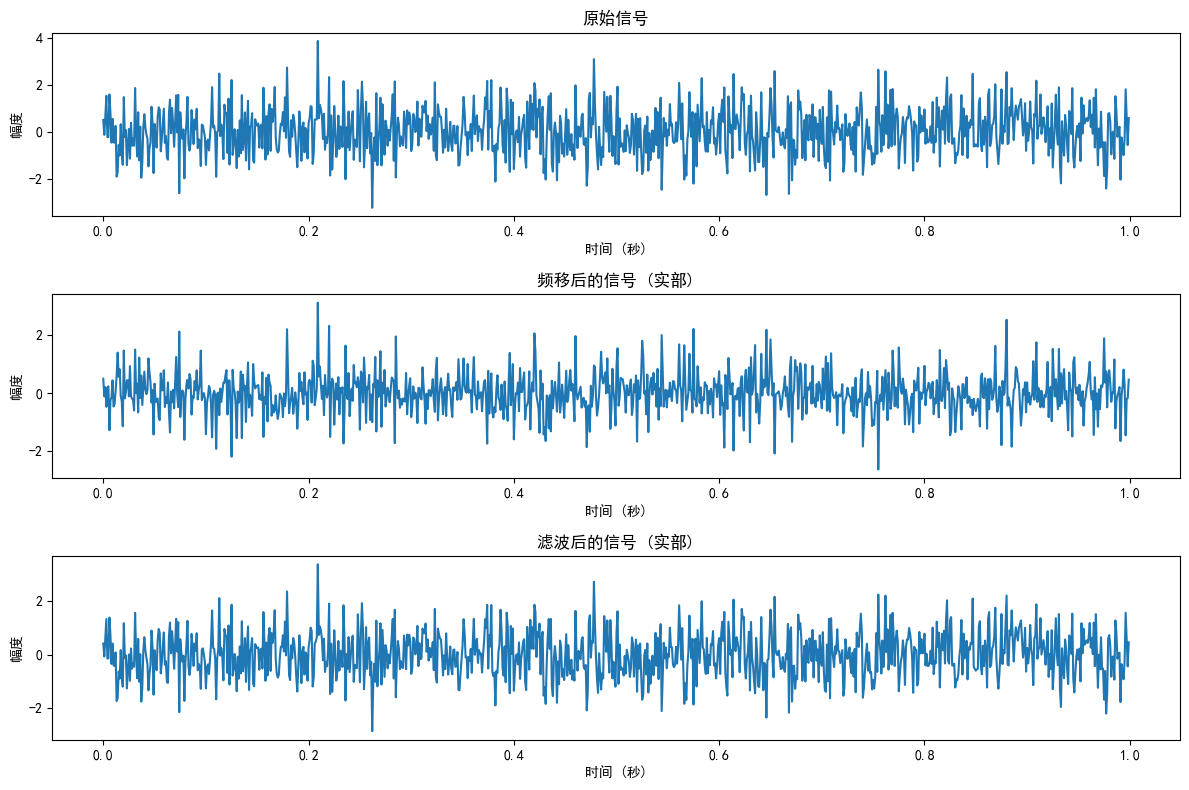

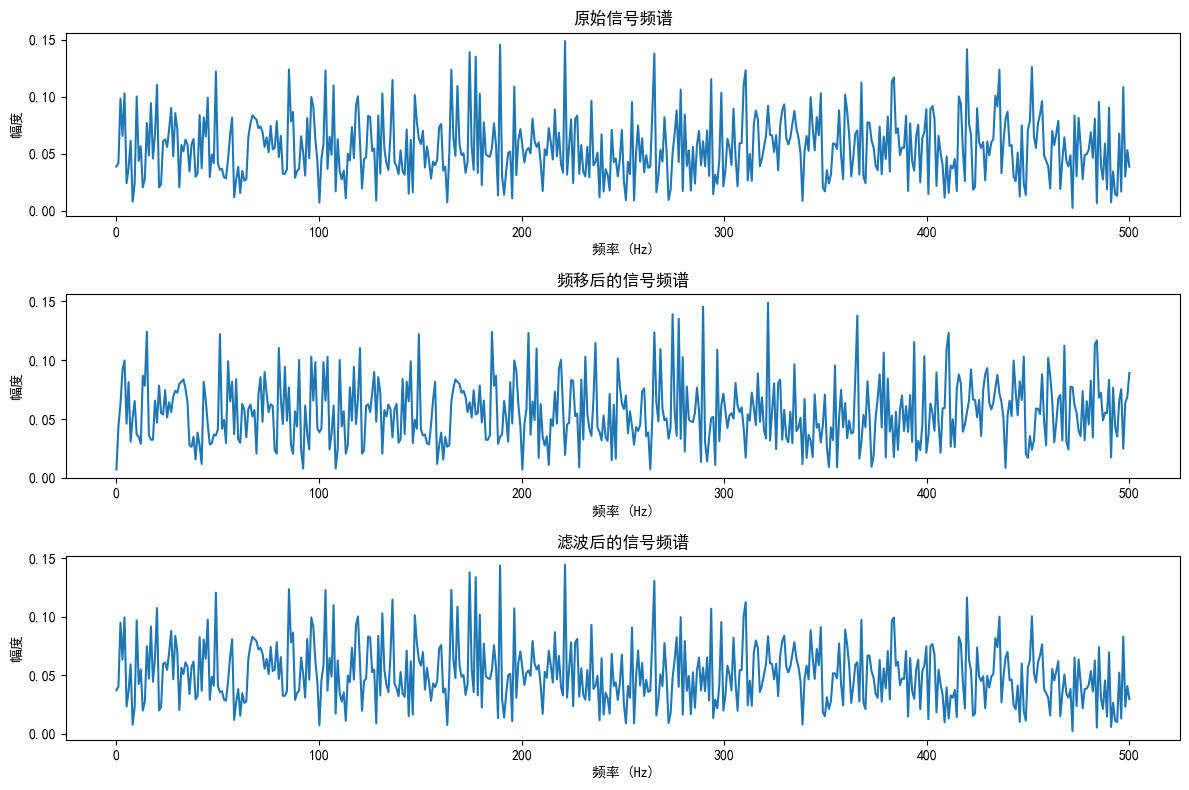

In [29]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

def data_sft(x, fc, fs):
    y = x * np.exp(1j * 2 * np.pi * fc / fs * (np.arange(0, len(x))))
    return y

def data_filter(x, n, fs, fre_s, fre_e):
    fre = -(fre_s + fre_e) / 2
    x = data_sft(x, fre, fs) # 频率搬移
    fre_pass = (fre_e - fre_s)
    b = scipy.signal.firwin(n, fre_pass / fs)
    x_filtered = scipy.signal.convolve(x, b, 'same') # 使用卷积实现滤波
    y = data_sft(x_filtered, -1 * fre, fs) # 频率回搬移
    b = data_sft(b, -1 * fre, fs) # 滤波器的频率回搬移
    return y, b

# 生成随机输入信号
np.random.seed(42)  # 设置随机种子以确保结果可重复
fs = 1000  # 采样频率为1000 Hz
t = np.linspace(0, 1, fs, endpoint=False)  # 1秒的时间序列
f1, f2, f3 = 50, 120, 200  # 三个不同的频率分量

# 生成包含三个频率分量的信号
x = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.3 * np.sin(2 * np.pi * f3 * t)
# x += np.random.normal(0, 0.1, fs)  # 添加一些噪声
x = np.random.normal(0,1,fs)

# 应用频率搬移
fc = 100  # 搬移频率
y_shifted = data_sft(x, fc, fs)

# 应用带通滤波
n = 3  # 滤波器阶数
fre_s, fre_e = 80, 160  # 通带范围
y_filtered, b = data_filter(x, n, fs, fre_s, fre_e)

# 绘制结果
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('原始信号')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')

plt.subplot(3, 1, 2)
plt.plot(t, np.real(y_shifted))
plt.title('频移后的信号 (实部)')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')

plt.subplot(3, 1, 3)
plt.plot(t, np.real(y_filtered))
plt.title('滤波后的信号 (实部)')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')

plt.tight_layout()
plt.show()

# 显示频谱
def plot_spectrum(x, fs, title):
    f = np.linspace(0, fs/2, len(x)//2)
    X = np.fft.fft(x)
    plt.plot(f, 2/len(x) * np.abs(X[:len(x)//2]))
    plt.title(title)
    plt.xlabel('频率 (Hz)')
    plt.ylabel('幅度')

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plot_spectrum(x, fs, '原始信号频谱')

plt.subplot(3, 1, 2)
plot_spectrum(y_shifted, fs, '频移后的信号频谱')

plt.subplot(3, 1, 3)
plot_spectrum(y_filtered, fs, '滤波后的信号频谱')

plt.tight_layout()
plt.show()

In [30]:
! pip install scipy

In [31]:
b.shape

(3,)

In [32]:
y_filtered[0:10]


array([ 0.4219345 +0.00646834j, -0.06235404-0.00706295j,
        0.62814813-0.07771936j,  1.33546162+0.0412547j ,
       -0.13793862+0.08220452j, -0.13512633-0.08483366j,
        1.38993177-0.04685595j,  0.71782588+0.09584255j,
       -0.34004437+0.01052018j,  0.42192717-0.00028335j])

In [36]:
### 适用b 和x 直接计算y， 与data_filter的结果对比
y_filtered2 = scipy.signal.convolve(x, b,mode='valid')
y_filtered2[0:10]


array([-0.04061922-0.04783295j,  0.51110284+0.37334201j,
        0.94526884+0.94425977j, -0.15682579-0.03450097j,
       -0.04043022-0.15434142j,  1.04529176+0.91731726j,
        0.45766381+0.56125184j, -0.25508324-0.22510751j,
        0.30776563+0.28862247j, -0.32114376-0.23686588j])

In [34]:
x[0:10]

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

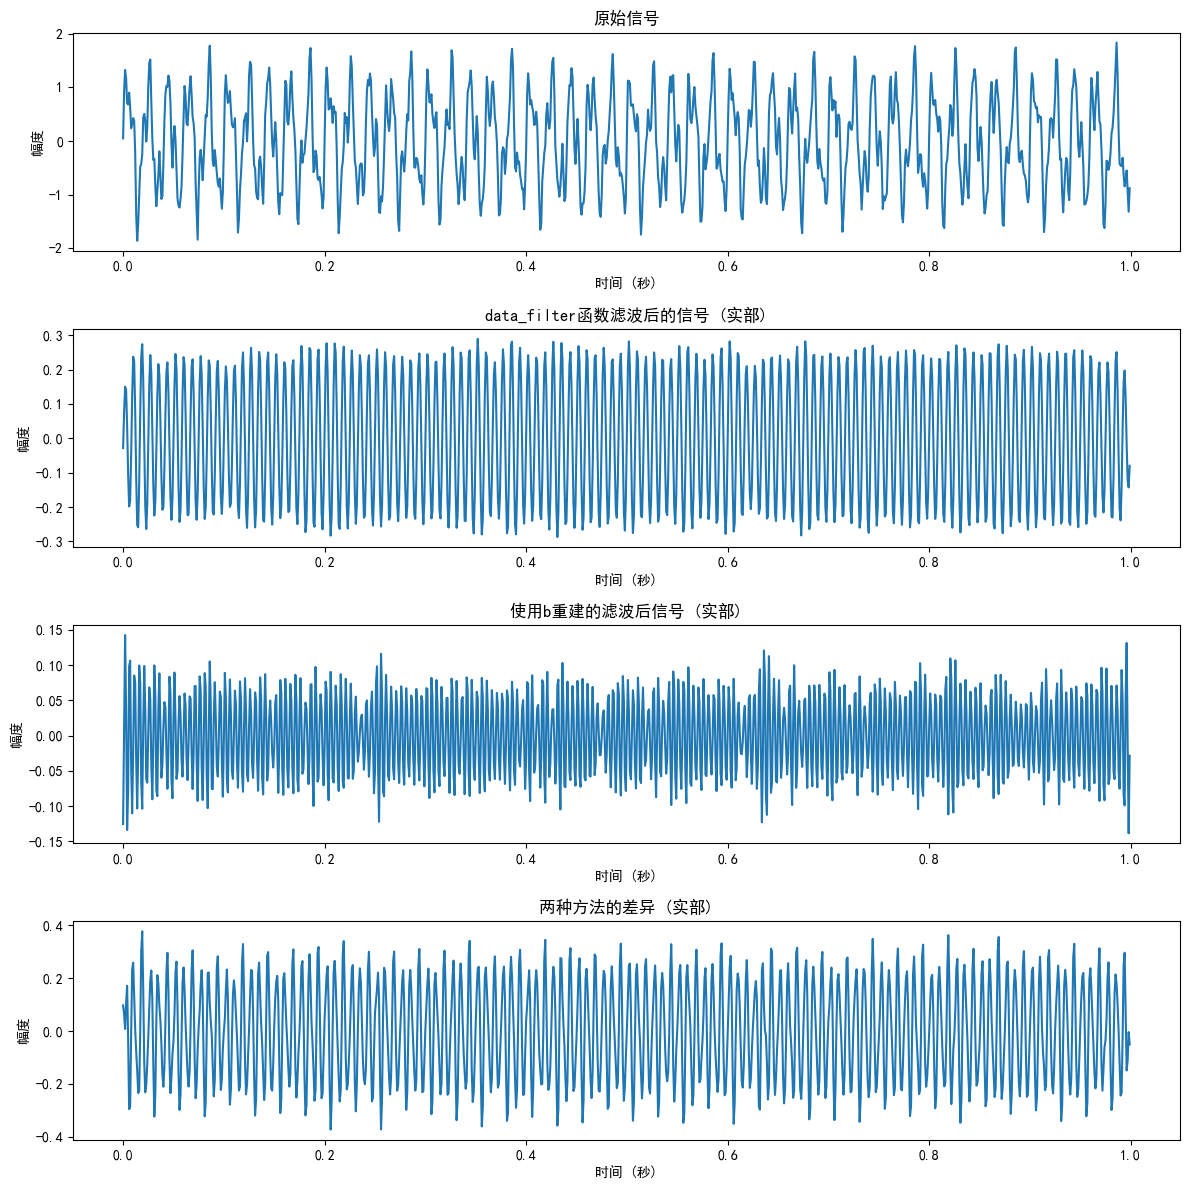

均方误差: 0.0702289656525359


In [37]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def data_sft(x, fc, fs):
    y = x * np.exp(1j * 2 * np.pi * fc / fs * (np.arange(0, len(x))))
    return y

def data_filter(x, n, fs, fre_s, fre_e):
    fre = -(fre_s + fre_e) / 2
    x = data_sft(x, fre, fs)
    fre_pass = (fre_e - fre_s)
    b = scipy.signal.firwin(n, fre_pass / fs)
    x_filtered = scipy.signal.convolve(x, b, 'same')
    y = data_sft(x_filtered, -1 * fre, fs)
    b = data_sft(b, -1 * fre, fs)
    return y, b

# 生成随机输入信号
np.random.seed(42)
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
f1, f2, f3 = 50, 120, 200

x = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.3 * np.sin(2 * np.pi * f3 * t)
x += np.random.normal(0, 0.1, fs)

# 应用带通滤波
n = 101
fre_s, fre_e = 80, 160
y_filtered, b = data_filter(x, n, fs, fre_s, fre_e)

# 使用返回的b重新构建滤波后的信号
fre = -(fre_s + fre_e) / 2
x_shifted = data_sft(x, fre, fs)
y_reconstructed = scipy.signal.convolve(x_shifted, b, 'same')
y_reconstructed = data_sft(y_reconstructed, -1 * fre, fs)

# 绘制结果
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
plt.plot(t, x)
plt.title('原始信号')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')

plt.subplot(4, 1, 2)
plt.plot(t, np.real(y_filtered))
plt.title('data_filter函数滤波后的信号 (实部)')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')

plt.subplot(4, 1, 3)
plt.plot(t, np.real(y_reconstructed))
plt.title('使用b重建的滤波后信号 (实部)')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')

plt.subplot(4, 1, 4)
plt.plot(t, np.real(y_filtered - y_reconstructed))
plt.title('两种方法的差异 (实部)')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')

plt.tight_layout()
plt.show()

# 计算并打印均方误差
mse = np.mean(np.abs(y_filtered - y_reconstructed)**2)
print(f'均方误差: {mse}')